### **Data Preprocessing**

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [129]:
# Dataset
regular = pd.read_csv("Stephen Curry Regularseason Stats.csv")

print("Dataset shape:", regular.shape)
print("\nColumns:", regular.columns.tolist())
print("\nFirst 3 Years:\n", regular.head(3))

Dataset shape: (881, 27)

Columns: ['Season_year', 'Season_div', 'Date', 'OPP', 'Result', 'T Score', 'O Score', 'MIN', 'FG', 'FGM', 'FGA', 'FG%', '3PT', '3PTM', '3PTA', '3P%', 'FT', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS']

First 3 Years:
   Season_year Season_div      Date  OPP Result  T Score  O Score   MIN     FG  \
0   2009-2010    Regular  Wed 4/14  POR      W      122      116  48.0  13-25   
1   2009-2010    Regular  Tue 4/13  UTA      L       94      103  41.0   5-15   
2   2009-2010    Regular  Sun 4/11  OKC      W      120      117  35.0   9-16   

   FGM  ...  FTM  FTA    FT%  REB  AST  BLK STL  PF  TO  PTS  
0   13  ...   12   12  100.0    9    8    1   2   0   2   42  
1    5  ...    6    6  100.0    5    6    0   2   4   2   17  
2    9  ...    4    6   66.7    7    7    0   1   2   5   25  

[3 rows x 27 columns]


In [130]:
# Check data quality and unique seasons
print("Seasons:", sorted(regular['Season_year'].unique()))
print("\nSeasons with data:", regular['Season_year'].nunique())
print("\nMissing values:")
print(regular[['Season_year', 'PTS']].isnull().sum())

# Convert points to numeric 
regular['PTS'] = pd.to_numeric(regular['PTS'], errors='coerce')

# Key statistics
season_stats = regular.groupby('Season_year').agg({
    'PTS': ['sum', 'mean', 'count'],
    'MIN': 'mean'  
}).round(2)

# Rename columns
season_stats.columns = ['Total_Points', 'PPG', 'Games_Played', 'Avg_Minutes']
season_stats = season_stats.reset_index()

print("\nSeason-level statistics:")
season_stats


Seasons: ['2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']

Seasons with data: 14

Missing values:
Season_year    0
PTS            0
dtype: int64

Season-level statistics:


,Season_year,Total_Points,PPG,Games_Played,Avg_Minutes
0,2009-2010,1399,17.49,80,36.19
1,2010-2011,1373,18.55,74,33.68
2,2011-2012,383,15.32,25,29.12
3,2012-2013,1786,22.90,78,38.29
4,2013-2014,1873,24.01,78,36.45
5,2014-2015,1900,23.75,80,32.66
6,2015-2016,2375,30.06,79,34.24
7,2016-2017,1999,25.30,79,33.39
8,2017-2018,1346,26.39,51,31.98
9,2018-2019,1881,27.26,69,33.75


### **Steph Curry Regular Season Points Per Game (PPG) Analysis**


### *Data Exploration Method 1: Descriptive Statistics and Data Exploration*

In [131]:
# Summary statistics
print("Stephen Curry PPG Summary:")
print(season_stats['PPG'].describe())
print(f"\nCareer High PPG: {season_stats['PPG'].max():.1f} ({season_stats.loc[season_stats['PPG'].idxmax(), 'Season_year']})")
print(f"Career Low PPG: {season_stats['PPG'].min():.1f} ({season_stats.loc[season_stats['PPG'].idxmin(), 'Season_year']})")
print(f"Career Average PPG: {season_stats['PPG'].mean():.1f}")

# Descriptive statistics
from scipy import stats

print(f"\nDescriptive Statistics:")
print(f"Median PPG: {season_stats['PPG'].median()}")
print(f"25th Percentile: {season_stats['PPG'].quantile(0.25):.2f}")
print(f"75th Percentile: {season_stats['PPG'].quantile(0.75):.2f}")
print(f"IQR: {season_stats['PPG'].quantile(0.75) - season_stats['PPG'].quantile(0.25):.2f}")
print(f"Skewness: {stats.skew(season_stats['PPG']):.3f}")

Stephen Curry PPG Summary:
count    14.000000
mean     24.193571
std       4.871365
min      15.320000
25%      21.325000
50%      24.655000
75%      27.042500
max      31.980000
Name: PPG, dtype: float64

Career High PPG: 32.0 (2020-2021)
Career Low PPG: 15.3 (2011-2012)
Career Average PPG: 24.2

Descriptive Statistics:
Median PPG: 24.655
25th Percentile: 21.32
75th Percentile: 27.04
IQR: 5.72
Skewness: -0.249


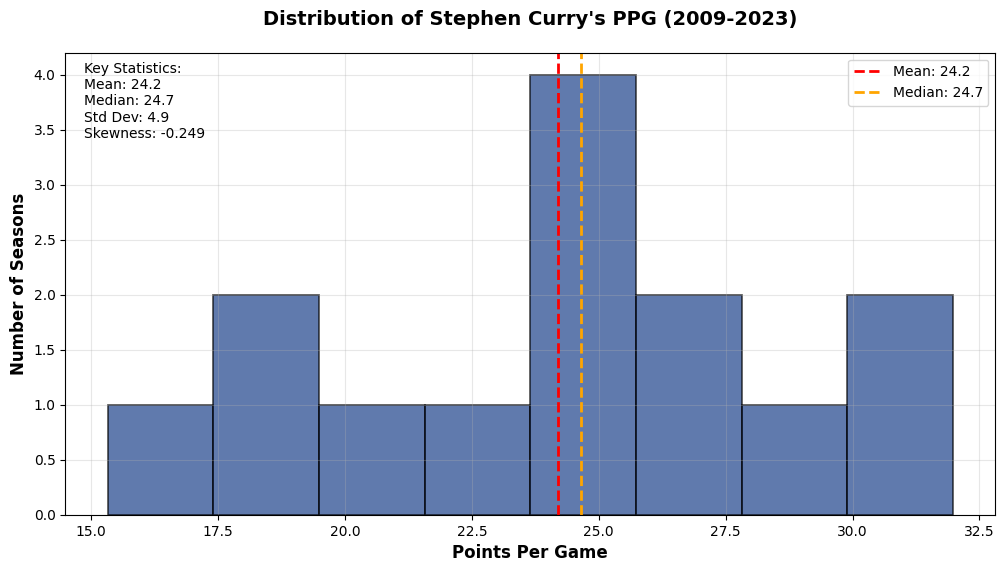

In [132]:
plt.figure(figsize=(12, 6))
plt.hist(season_stats['PPG'], bins=8, alpha=0.7, color='#1D428A', edgecolor='black', linewidth=1.2)

# Vertical lines for mean and median
plt.axvline(season_stats['PPG'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {season_stats["PPG"].mean():.1f}')
plt.axvline(season_stats['PPG'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {season_stats["PPG"].median():.1f}')

# Title and labels
plt.title("Distribution of Stephen Curry's PPG (2009-2023)", fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Points Per Game", fontsize=12, fontweight='bold')
plt.ylabel("Number of Seasons", fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Text legend
stats_text = f"""Key Statistics:
Mean: {season_stats['PPG'].mean():.1f}
Median: {season_stats['PPG'].median():.1f}
Std Dev: {season_stats['PPG'].std():.1f}
Skewness: {stats.skew(season_stats['PPG']):.3f}"""
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, verticalalignment='top')

plt.show()


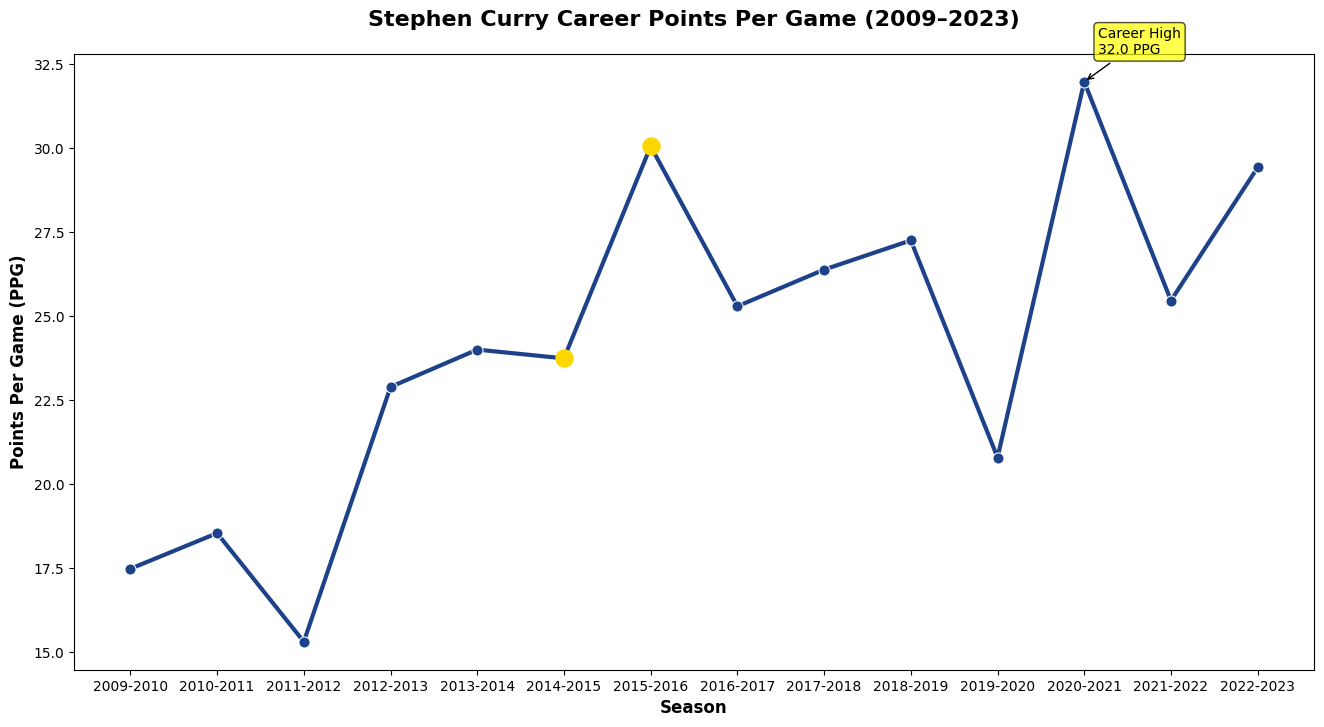

In [133]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=season_stats, x='Season_year', y='PPG', marker='o', 
             color='#1D428A', linewidth=3, markersize=8)

# MVP seasons
mvp_data = season_stats[season_stats['Season_year'].isin(mvp_seasons)]
plt.scatter(mvp_data['Season_year'], mvp_data['PPG'], 
           color='gold', s=150, zorder=5, label='MVP Seasons')

# Title and Labels
plt.title("Stephen Curry Career Points Per Game (2009–2023)", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Season", fontsize=12, fontweight='bold')
plt.ylabel("Points Per Game (PPG)", fontsize=12, fontweight='bold')

# Annotations
max_ppg_season = season_stats.loc[season_stats['PPG'].idxmax()]
plt.annotate(f'Career High\n{max_ppg_season["PPG"]:.1f} PPG', 
            xy=(max_ppg_season['Season_year'], max_ppg_season['PPG']),
            xytext=(10, 20), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.show()


**Conclusion 1**: Stephen Curry's career PPG shows a clear upward trajectory from his rookie season (15.3 PPG) to his peak performance (32.0 PPG in 2020-2021). The data reveals a right-skewed distribution with a mean of 24.2 PPG and median of 24.7 PPG, indicating some seasons significantly above average. The interquartile range of 5.7 points shows moderate variability, while the career high of 32.0 PPG represents a substantial outlier. The distribution suggests Curry had several exceptional seasons that pulled the mean above the median, with his peak performance occurring during the 2020-2021 season.

### *Data Exploration Method 2: Hypothesis Testing*

### *Data Exploration Method 3: Correlation/Regression Analysis*